In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

In [3]:
movies=pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


### EDA:

In [4]:
movies.shape

(10, 15)

In [5]:
movies.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

#### In movies dataset,columns V4 and V5 contains full of null values and V3 got 3 null values

In [6]:
movies.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [7]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
movies.nunique()

V1               4
V2               5
V3               4
V4               1
V5               1
Sixth Sense      2
Gladiator        2
LOTR1            2
Harry Potter1    2
Patriot          2
LOTR2            2
Harry Potter2    2
LOTR             2
Braveheart       2
Green Mile       2
dtype: int64

In [9]:
#movies dataframe holds both orginal and encoded version of features.So,let's remove the orginal features for further processing
movies=movies.drop(['V1','V2','V3','V4','V5'],axis=1)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [10]:
movies.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

##### No null values

In [11]:
movies.nunique()

Sixth Sense      2
Gladiator        2
LOTR1            2
Harry Potter1    2
Patriot          2
LOTR2            2
Harry Potter2    2
LOTR             2
Braveheart       2
Green Mile       2
dtype: int64

### Model Building
### Apriori Algorithm

In [12]:
frequent_items=apriori(df=movies,min_support=0.1,use_colnames=True)
frequent_items['length']=frequent_items['itemsets'].apply(lambda x:len(x))
frequent_items
#Apriori Algorithm
#Testing with support 10%

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [13]:
rule1=association_rules(df=frequent_items,metric='support',min_threshold=0.1) #rule with support as metrics
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(LOTR2, Harry Potter1, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(Harry Potter1),"(LOTR2, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


#### Leverage value of 0 indicates it's independent
#### Value of conviction should be always greater than 1,shows the measure of dependence of consequents on atecedents

In [14]:
rule1[rule1['lift']>1] #sorting rule based on greater lift ratio(lift > 1 shows good association)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(LOTR2, Harry Potter1, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(Harry Potter1),"(LOTR2, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


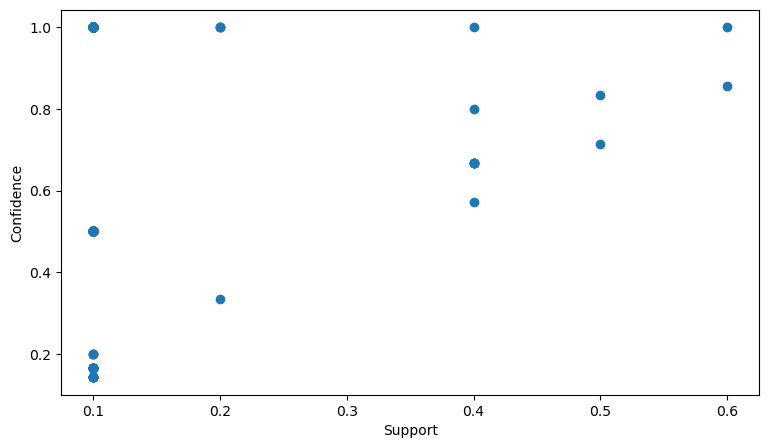

In [15]:
#scatter plot for confidence and support 
plt.figure(figsize=(9,5))
plt.scatter(rule1['support'],rule1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [16]:
x=rule1.support
y=rule1.confidence

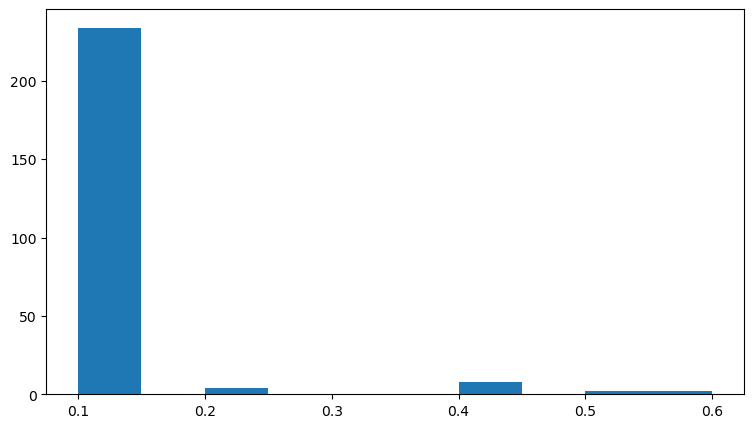

In [17]:
plt.figure(figsize=(9,5))
plt.hist(x)
plt.show()

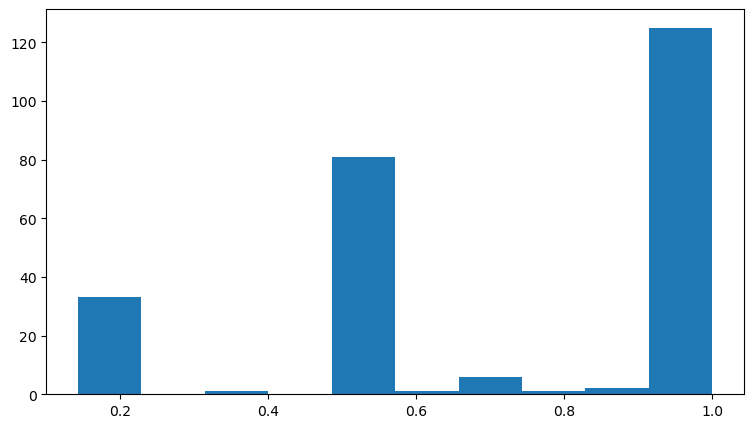

In [18]:
plt.figure(figsize=(9,5))
plt.hist(y)
plt.show()

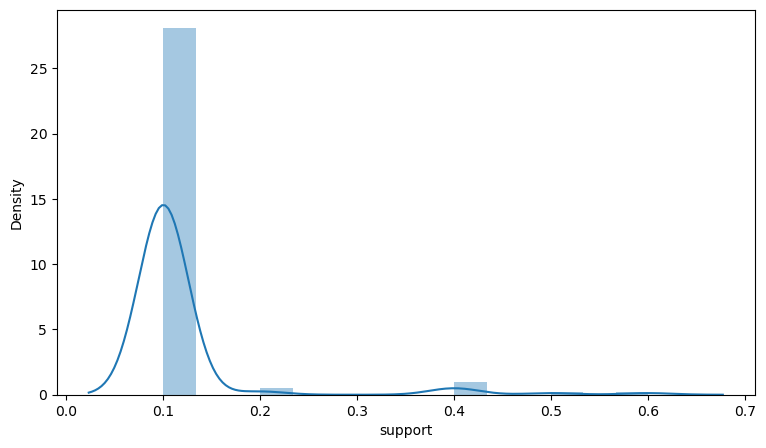

In [19]:
plt.figure(figsize=(9,5))
sns.distplot(x)
plt.show()

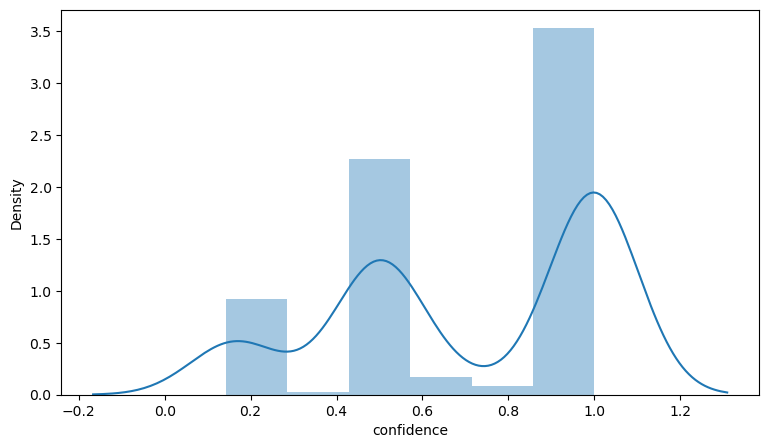

In [20]:
plt.figure(figsize=(9,5))
sns.distplot(y)
plt.show()

In [21]:
rule2=association_rules(df=frequent_items,metric='support',min_threshold=0.2) #association rule with increased threshhold(0.2)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [22]:
rule2[rule2['lift']>1]  #sorting rule based on greater lift ratio(lift > 1 shows good association)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


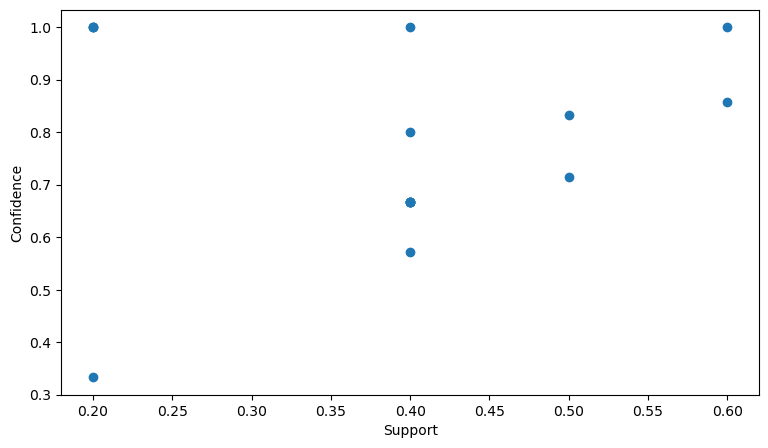

In [23]:
plt.figure(figsize=(9,5))
plt.scatter(rule2['support'],rule2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [24]:
rule3=association_rules(df=frequent_items,metric='support',min_threshold=0.4) #association rule with increased threshhold(0.4)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000


In [25]:
rule3[rule3['lift']>1]  #sorting rule based on greater lift ratio(lift > 1 shows good association)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000


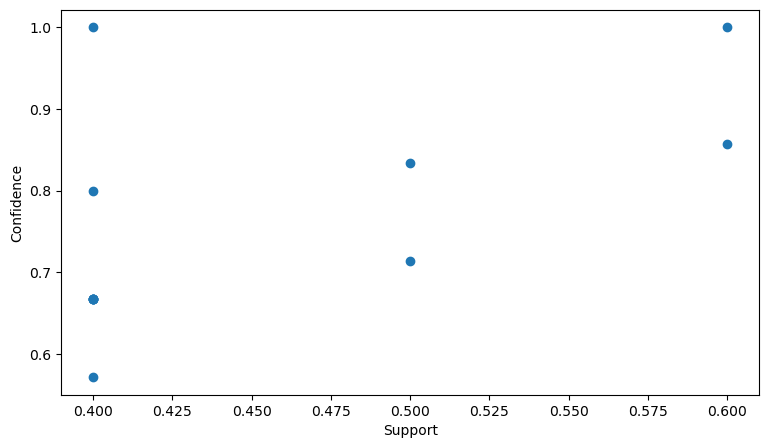

In [26]:
plt.figure(figsize=(9,5))
plt.scatter(rule3['support'],rule3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()